<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_4_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Linear Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score, classification_report, log_loss

## 1.4.1 Logistic Regression

### 1.4.1.1 Introduction to Logistic Regression

#### What is Logistic Regression?

- **Logistic regression** is a classification algorithm
- Let's say we have a telecommunications dataset that we'd like to analyze in order to understand which customers might leave us next month
- Each row represents one customer
- The target variable is `churn`
    - Indicates which customers left within the last month
- The dataset contains information about services that each customer has signed up for, customer account information and demographic information

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/ChurnData.csv'

data = pd.read_csv(data_url)
data = data.head(5)
data = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- In logistic regression, we use one or more independent variables to predict an outcome represented by the dependent variable
- In linear regression we predicted a continuous variable
- In logistic regression we predict a binary variable, which can be coded as 0 or 1
    - The independent variables should be continuous or dummy/indicator encoded
    - Can also be used for multi-class classification (not covered in this video)

#### Logistic Regression Applications

- Predicting the probability of a person having a heart attack
- Predicting the mortality in injured patients
- Predicting customer's propensity to purchase a product or halt a subscription
- Predicting the probability of failure of a given process or product
- Predicting the likelihood of a homeowner defaulting on a mortgage

In each case, we don't just predict the class of each case, we also predict the probability of a case belonging to a specific class.

- There are different machine algorithms which can classifiy or estimate a variable
- Why choose logistic regression?
 1. If your data is binary
 2. If you need probabilistic results
 3. When you need a linear decision boundary
   - That boundary can be a line, a plane, or a hyperplane
   - Note that it is also possible to achieve a complex decision boundary using polynomial processing (out of scope for this video)
 4. If you need to understand the impact of a feature
   - You can select the best features based on the statistical significance of the logistic regression model coefficients or parameters ($\theta_1$, $\theta_2$, ...)
   - It allows us to understand the impact an independent variable has on the dependent variable while contolling other independent variables

$$
\begin{align}
\mathbf{X} &\in \mathbb{R} \\
\mathbf{y} &\in \{0,1\}
\end{align}
$$

<br>

$$
\widehat{\mathbf{y}} = \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

<br>

$$
\mathbf{P}\left(\mathbf{y}=0|\mathbf{x}\right) = 1 - \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

### 1.4.1.2 Logistic Regression vs. Linear Regression

In [3]:
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- $\mathbf{y}$ is the labels vector
- $\widehat{\mathbf{y}}$ is the vector of the values predicted by our model
- If we map the target labels to integer values, $\{0,1\}$, can we use linear regression to solve this problem?
    - No

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear.png'/>

- In the above graph, $\widehat{\mathbf{y}} = a + bx_1$
- Can we use the same technique to predict a categorical target such as churn?
    - Let's try:

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear2.png'/>

- The vector, $\theta$ is the vector of parameters
    - also called the **weights factor** or **confidences** of the equation
- $\mathbf{X}$ are all the feature sets
- Our line has equation $\theta^{T}\mathbf{X} = -1 + 0.1 x_{1}$
- Now, we use this regression line to predict the churn of a new customer
- Below, we predict the class of someone with `Age = 13`

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear3.png'/>

- Class 0 is predicted
    - But, since we used linear regression, we don't have a probability

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear4.png'/>

- We used a **threshold** of 0.5
    - No matter how big the number is, as long as it is bigger than 0.5, Class 0 is predicted
    - No matter how small the number is, as long as it is less than 0.5, Class 1 is predicted
- There is no difference between a customer who has a value of 1 or 1000, the outcome is still the same

#### The Simoid Function (aka The Logistic Function)

What we need is a method that would give us a probability of falling in a particular class
    - Instead of using $\theta^{T}\mathbf{X}$, use is a function called `sigmoid`

$$
\begin{align}
\sigma\left(\theta^{T}\mathbf{X}\right) &= \sigma\left(\theta_{0} + \theta_{1}x_{1} + \dots\right) \\
\sigma\left(\theta^{T}\mathbf{X}\right) &= \frac{1}{1 + e^{-\theta^{T}\mathbf{X}}}
\end{align}
$$

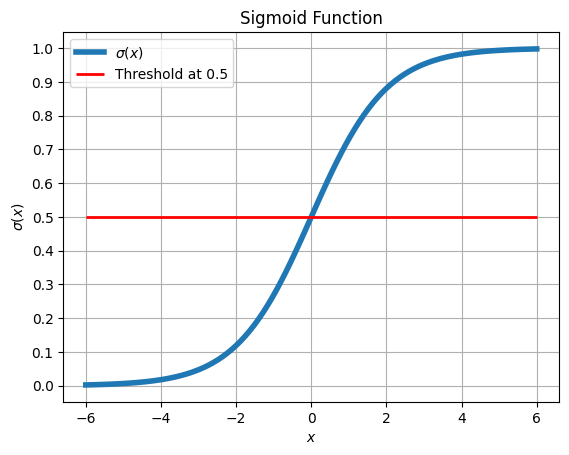

In [4]:
x = np.linspace(-6, 6, 100)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), linewidth=4, label='$\sigma(x)$')
plt.hlines(0.5, -6, 6, color='red', linewidth=2, label='Threshold at 0.5')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Sigmoid Function')
plt.legend();

#### What is the output of our model when we use logistic regression?

Now,

$$
\widehat{\mathbf{y}} = \sigma(\theta^{T}\mathbf{X})
$$

and this gives us

$$
P(\widehat{y}=1|x)
$$

- `P(Churn=1|income, age) = 0.8`
- `P(Churn-0|income, age) = 1 - 0.8 = 0.2`
- Now our job is to train the model to set its parameter values in such a way that our model is a good estimate of $P(\mathbf{y}=1|x)$

#### The Training Process

$$
\sigma\left(\theta^{T}\mathbf{X}\right) \rightarrow \mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right)
$$

1. Initialize $\theta$
    - $\theta = [-1, 2]$
2. Calculate $\widehat{\mathbf{y}} =\sigma(\theta^{T}\mathbf{X})$ for a customer
    - $\widehat{\mathbf{y}} = \sigma([-1, 2] \cdot [2, 5]) = 0.997$
    - this is the probability that the customer belongs to the default class


In [5]:
sigmoid(np.array([-1, 2]).dot(np.array([2, 4])))

0.9975273768433653

3. Compare the output, $\widehat{\mathbf{y}}$ with $\mathbf{y}$ and record it as error:
    - `Error = 1 - 0.9997 = 0.0003`

4. Calculate the error for all customers.
 - Cost = $J(\theta)$
 - The cost shows how poorly the model is estimating the labels correctly
   - The lower the cost, the better the model
   - We want to minimize the cost
5. Change $\theta$ to reduce the cost
 - $\theta_{new}$
6. Go back to step 2 and iterate until the cost is low enough

#### Two questions arise from this

1. How can we change the values of $\theta$ so that the cost is reduced?
    - Gradient Descent
        - This is not the only way
2. When should we stop the interations?
    - There are various ways to do this, but essentially, you stop when the cost is satisfactory

### 1.4.1.3 Logistic Regression Training

$$
\sigma\left(\theta^{T}\mathbf{X}\right) \rightarrow \mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right)
$$

Change the weights $\rightarrow$ Reduce the cost

#### Cost Function

$$
Cost\left(\widehat{y}, y\right) = \frac{1}{2}\left(\sigma(\theta^{T}\mathbf{X}) - y\right)^{2}
$$

- Look at the cost function to see the relationship between the cost function and the parameters, $\theta$
- Using the derivative of the cost function we can find how to change the parameters to reduce the cost, or rather, the error
- The cost function is the difference between the actual values, $y$, and our model's output, $\widehat{y}$
- Usually, the square is used to eliminate negative results
- Multiplying it by $\frac{1}{2}$ simplifies the math

#### Cost Function for all the samples in our training set

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}Cost\left(\widehat{y},y\right)
$$

#### In practice, another cost function is used

- With this function, it is easier to find its minimum because it is convex

$$
Cost\left(\widehat{y},y\right) =
\begin{cases}
-log{\left(\widehat{y}\right)} & y=1 \\
-log{\left(1 - \widehat{y}\right)} & y=0
\end{cases}
$$

#### Plotting the cost function of our model

- $y$ can be 1 or 0
- Suppose $y = 1$

$$
\begin{align}
\widehat{y} = 1 \rightarrow Cost = 0 \\
\widehat{y} = 0 \rightarrow Cost = 1
\end{align}
$$

#### Cost Function for all the samples in our training set

- This works because y can only be 0 or 1

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}
$$

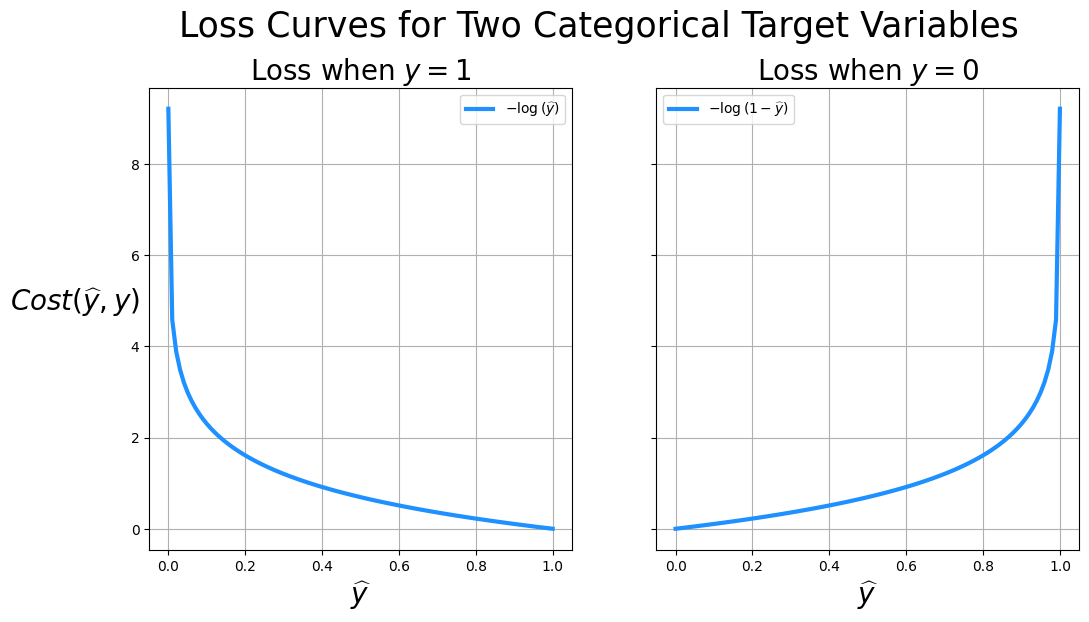

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
y_hat = np.linspace(0.0001, 0.9999, 100)

ax[0].plot(y_hat, -np.log(y_hat), color='dodgerblue', lw=3, label='$-\log{(\widehat{y})}$')
ax[0].set_title('Loss when $y = 1$', fontsize=20)
ax[0].set_xlabel('$\widehat{y}$', fontsize=20)
ax[0].set_ylabel('$Cost(\widehat{y},y)$', rotation=0, labelpad=40, fontsize=20)
ax[0].legend()
ax[0].grid()

ax[1].plot(y_hat, -np.log(1 - y_hat), color='dodgerblue', lw=3, label='$-\log{(1 - \widehat{y})}$')
ax[1].set_title('Loss when $y = 0$', fontsize=20)
ax[1].set_xlabel('$\widehat{y}$', fontsize=20)
ax[1].legend()
ax[1].grid()

plt.suptitle('Loss Curves for Two Categorical Target Variables', fontsize=25, y=1.01)
plt.show()

#### Minimizing the cost function of the model

- This is done by minimizing the cost function using **gradient descent**
- Gradient descent is an iterative approach to finding the minimum of a function
- The **derivative** of the cost function is used to change the parameter values in order to minimize the cost

#### Using gradient descent to minimize the cost

$$
J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}
$$

$$
\widehat{y} = \sigma\left(\theta_{1}x_{1} + \theta_{2}x_{2}\right)
$$

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/J.png'/>

- This curve is called the **error curver** or the **error bowl**
- The goal is to find the minimum value of the cost function
- Steps:
 1. Select some random parameter values that locate a point on the bowl
 2. Change parameters by $\Delta\theta_{1}$ and $\Delta\theta_{2}$ and take one step on the surface
    - As long as we are going downward, we can take one more step
    - The steeper the slope, the larger the step
    - Keep taking steps
    - To find the direction and size of the steps (in other words, how to update the parameters), the **gradient** of the cost function is calcuated at the current point
    - The gradient is the slope of the surface at each point and the direction of the gradient is the greatest uphill
    - The gradient is taken by taking the **partial derivative** of $J(\theta)$ with respect to each parameter at that point, which is the slope
    - If we move in the opposite direction of that slope, we are guaranteed to move downward on the error curve
      - For example, if we calcuate the derivative of $J$ with respent to $\theta_{1}$, we find that it is a positive number. This indicates that the function is increasing as $\theta_{1}$ increases. So to descrease $J$, we sholud move in the opposite direction. That means to move in hte direction of the negative derivative for $\theta_{1}$. We have to calculate it for other parameters as well at each step.
      - The gradient value also indicates how big of a step to take. If the slope is large, we should take a larger steop  because we are far from the minimum. If the slope is small, we should take a smaller step.
3. As we approach the lowest point, the slope diminishes, so we can take smaller steps until we reach a flat surface

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/J2.png'/>

$$
\frac{\partial{J}}{\partial{\theta_{1}}} = -\frac{1}{m}\sum_{i=1}^{m}\left(y^{i} - \widehat{y}^{i}\right)x_{1}^{i}
$$

- The calculatio of this partial derivative is beyond the scope of this course
- A vector of all these slopes (one element for each parameter) is called the **gradient vector** and we can use this vector to update all the parameters

$$
\Delta{J} =
\begin{bmatrix}
\frac{\partial{J}}{\partial{\theta_{1}}} \\
\frac{\partial{J}}{\partial{\theta_{2}}} \\
\frac{\partial{J}}{\partial{\theta_{2}}} \\
\vdots \\
\frac{\partial{J}}{\partial{\theta_{k}}}
\end{bmatrix}
$$

$$
New\;\theta = Old \; \theta - \mu\Delta{J}
$$

- Note also that the gradient vector is multiplied by a constant, $\mu$, which is called the learning rate.
- The learning rate gives us additional control over how fast we move on the surface

#### Training Algorithm Steps

1. Initialize the parameters randomly   
  - $\theta^{T} = \begin{bmatrix}\theta_{0} & \theta_{1} & \theta_{2} & \dots \theta_{k}\end{bmatrix}$
2. Feed the cost function with the training set, and calculate the error
  - $J\left(\theta\right) = \frac{1}{m}\sum_{i=1}^{m}y^{i}\log{(\widehat{y}^{i})} + (1 - y^{i})\log{(1 - \widehat{y}^{i})}$
  - We expect a high error rate since the parameters are set randomly
3. Calculate the gradient of the cost function
  - $\Delta{J} = \begin{bmatrix}
\frac{\partial{J}}{\partial{\theta_{1}}} &
\frac{\partial{J}}{\partial{\theta_{2}}} &
\frac{\partial{J}}{\partial{\theta_{2}}} &
\dots &
\frac{\partial{J}}{\partial{\theta_{k}}}
\end{bmatrix}$
  - We need all the training data to feed the equation for each parameter
  - This is an expensive part of the algorithm, but there are some solutions for this
4. Update weights with new values
  - $\theta_{new} = \theta_{prev} - \mu\Delta{J}$
5. Go to Step 2 and iterate until cost is small enough
6. Predict the new customer $X$
  - $\mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right) = \sigma\left(\theta^{T}\mathbf{X}\right)$

### 1.4.1.4 Lab - Logistic Regression

#### Customer Churn with Logistic Regression

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why

#### The Dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [7]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/ChurnData.csv'

churn_df = pd.read_csv(data_url)
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


#### Data Preprocessing and Selection

In [8]:
churn_df = churn_df.copy()[['tenure', 'age', 'address', 'income', 'ed',
                     'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [9]:
churn_df['churn'] = churn_df['churn'].astype(int)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


In [10]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [11]:
churn_df.shape

(200, 10)

In [12]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = churn_df['churn'].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [13]:
X = StandardScaler().fit(X).transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 7), (40, 7), (160,), (40,))

#### Model: Logistic Regression with Scikit-learn

Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:

In [15]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [16]:
y_hat = LR.predict(X_test)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [17]:
y_hat_proba = LR.predict_proba(X_test)
y_hat_proba

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

#### Evaluation

Let's try the **jaccard index** for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [18]:
jaccard_score(y_test, y_hat, pos_label=0)

0.7058823529411765

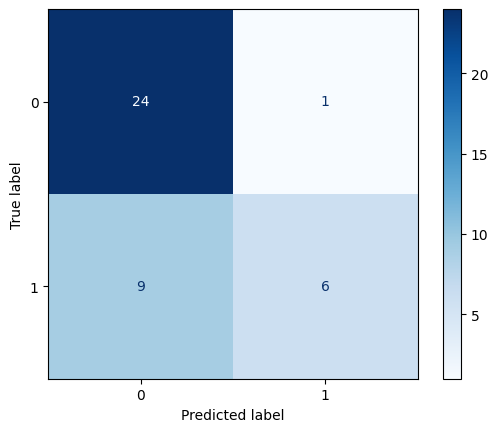

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat)).plot(cmap=plt.cm.Blues);

In [20]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [21]:
log_loss(y_test, y_hat_proba)

0.6017092478101185

In [22]:
LR2 = LogisticRegression(C=0.01, solver='sag', max_iter=10000).fit(X_train,y_train)
y_hat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, y_hat_prob2))

LogLoss: : 0.61
